In [1]:
import pandas as pd

# Step 1: Load the dataset
# Make sure the dataset name matches the file you have
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nDataset Summary:")
print(df.info())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

M

In [2]:
from sklearn.preprocessing import StandardScaler

# Step 2: Data Preprocessing

# Drop the 'CustomerID' column as it is not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

# Select the relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data
print("First few rows of the scaled data:")
print(pd.DataFrame(X_scaled, columns=features).head())


First few rows of the scaled data:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


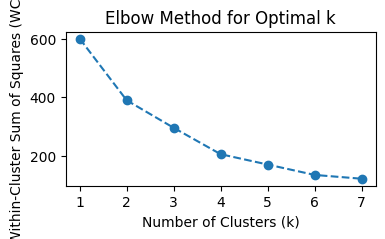

First few rows of the dataset with cluster labels:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        3
3  Female   23                  16                      77        2
4  Female   31                  17                      40        2


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3.1: Use the Elbow Method to find the optimal number of clusters
wcss = []  # List to store the WCSS values for each k

# Try different values of k from 1 to 10
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for the current number of clusters

# Plot the Elbow Method results
plt.figure(figsize=(4, 2))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Step 3.2: Fit K-Means with the optimal number of clusters (choose k based on the plot)
# Assuming k=5 based on the Elbow Method plot (you can choose a different number)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Display the first few rows of the DataFrame with cluster labels
print("First few rows of the dataset with cluster labels:")
print(df.head())


## Elbow method suggests k=4 . lets check with other methods

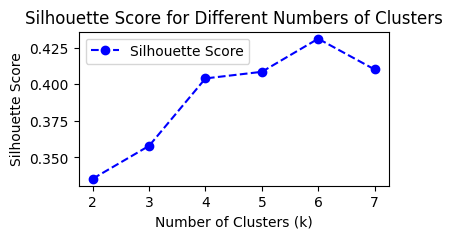

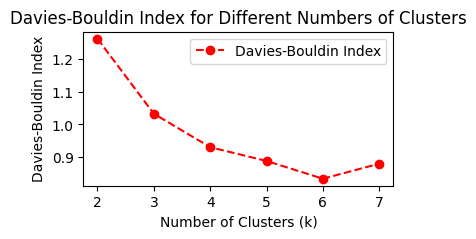

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# List to store silhouette scores and Davies-Bouldin Index for each k
silhouette_scores = []
davies_bouldin_scores = []

# Try different values of k from 2 to 10 (1 cluster is not meaningful for these metrics)
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, y_kmeans)
    davies_bouldin = davies_bouldin_score(X_scaled, y_kmeans)
    
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Plot the Silhouette Scores
plt.figure(figsize=(4, 2))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--', color='b', label='Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Plot the Davies-Bouldin Index
plt.figure(figsize=(4, 2))
plt.plot(range(2, 8), davies_bouldin_scores, marker='o', linestyle='--', color='r', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.legend()
plt.show()


##### Above methods show k-=6 as ideal

In [19]:
# Step 4: Fit K-Means with the optimal number of clusters (k=6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Display the first few rows of the DataFrame with cluster labels
print("First few rows of the dataset with cluster labels:")
print(df.head())

# Display the cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


First few rows of the dataset with cluster labels:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        5
3  Female   23                  16                      77        2
4  Female   31                  17                      40        5

Cluster Centers:
[[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]


In [20]:
# Step 5: Count the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Display the number of customers in each cluster
print("Number of customers in each cluster:")
print(cluster_counts)

Number of customers in each cluster:
Cluster
0    45
1    39
2    25
3    40
4    30
5    21
Name: count, dtype: int64


##### Let's visualise

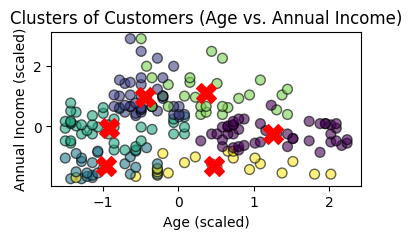

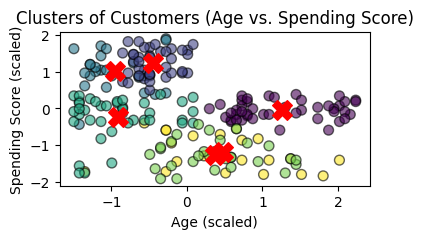

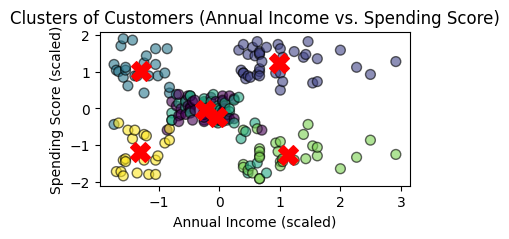

In [21]:
import matplotlib.pyplot as plt

# Step 6.1: Visualize clusters in 2D (Age vs. Annual Income)
plt.figure(figsize=(4, 2))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Clusters of Customers (Age vs. Annual Income)')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()

# Step 6.2: Visualize clusters in 2D (Age vs. Spending Score)
plt.figure(figsize=(4, 2))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X')
plt.title('Clusters of Customers (Age vs. Spending Score)')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

# Step 6.3: Visualize clusters in 2D (Annual Income vs. Spending Score)
plt.figure(figsize=(4, 2))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X')
plt.title('Clusters of Customers (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


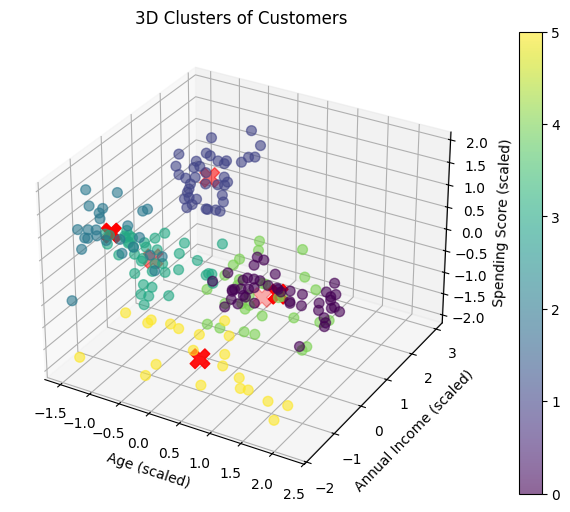

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Step 5.4: Visualize clusters in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X')
ax.set_title('3D Clusters of Customers')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
plt.colorbar(scatter)
plt.show()

##### Pair Plot

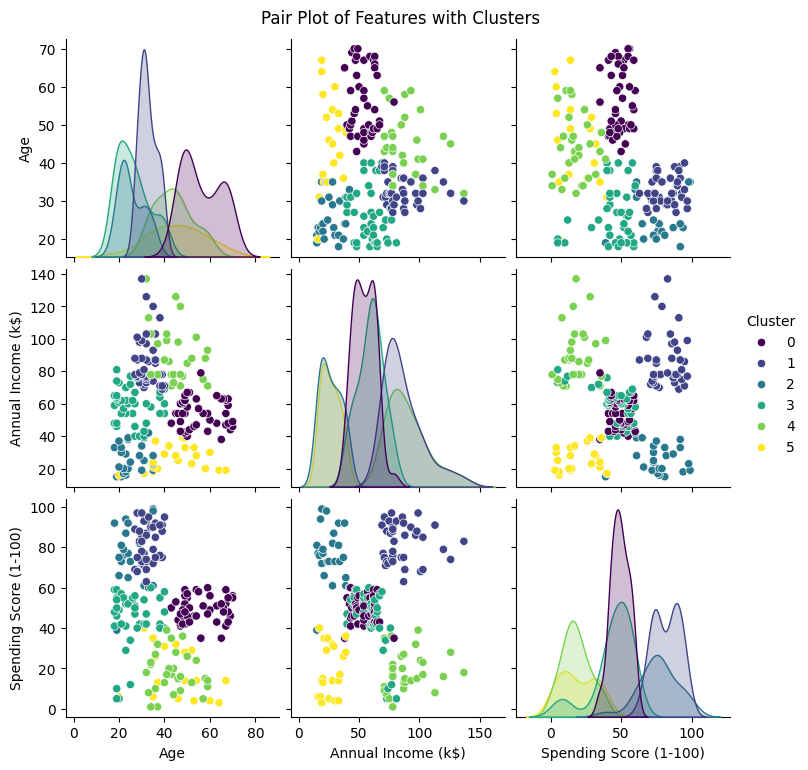

In [26]:
import seaborn as sns

# Step 6.5: Pair Plot Visualization
# Create a pair plot with the clusters colored differently
pair_plot = sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='viridis', diag_kind='kde')
pair_plot.fig.suptitle('Pair Plot of Features with Clusters', y=1.02)
plt.show()

##### Heatmap

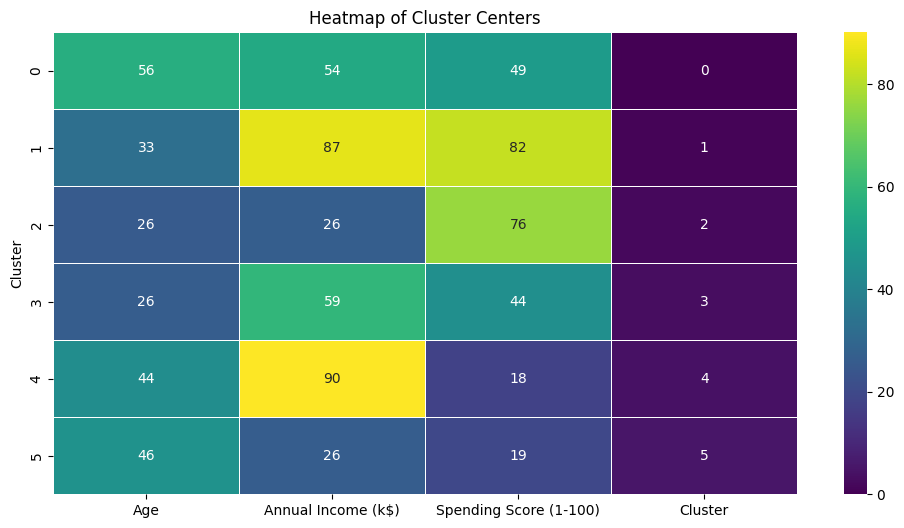

In [27]:
# Step 6.6: Heatmap Visualization (updated to include only numeric columns)
# Compute the average values of each numeric feature for each cluster
numeric_features = df.select_dtypes(include=[float, int]).columns  # Select numeric columns only
cluster_centers = df.groupby('Cluster')[numeric_features].mean()

# Create a heatmap to visualize the cluster centers
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Cluster Centers')
plt.show()
